In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Convert diagnosis to binary: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select 2 features for visualization
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [4]:
# Linear
print("Linear Kernel:")
print(confusion_matrix(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test)))

# RBF
print("RBF Kernel:")
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test)))

Linear Kernel:
[[67  4]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

RBF Kernel:
[[67  4]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



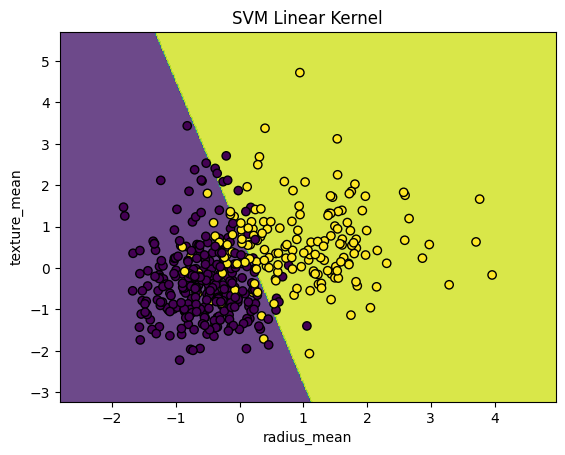

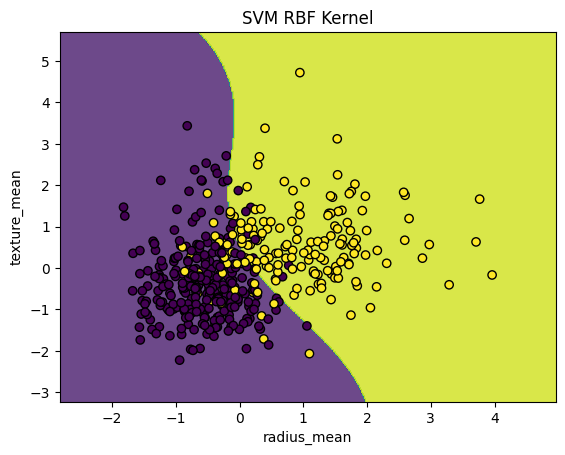

In [9]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM RBF Kernel")

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9010989010989011


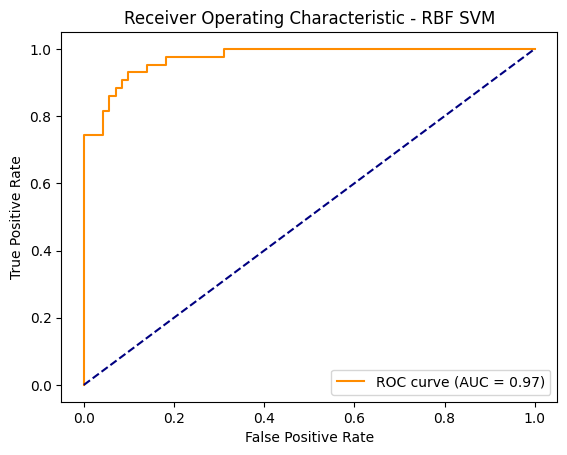

In [10]:
from sklearn.metrics import roc_curve, auc

y_scores = svm_rbf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RBF SVM')
plt.legend(loc="lower right")
plt.show()

In [13]:
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
print("Polynomial Kernel:")
print(classification_report(y_test, svm_poly.predict(X_test)))

Polynomial Kernel:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        71
           1       0.93      0.58      0.71        43

    accuracy                           0.82       114
   macro avg       0.86      0.78      0.79       114
weighted avg       0.84      0.82      0.81       114



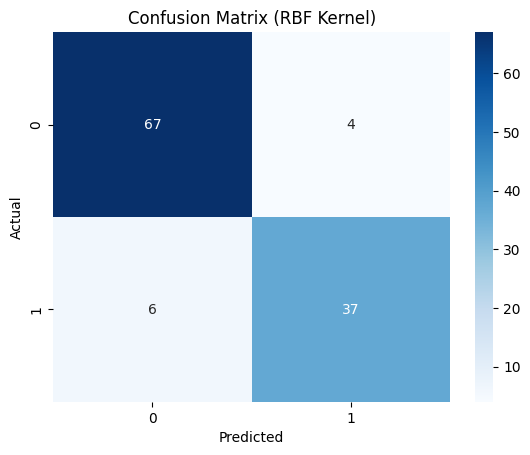

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, svm_rbf.predict(X_test), "Confusion Matrix (RBF Kernel)")